## 降维方法

- 所谓降维度，就是按照重要性排列现有特征，舍弃不重要的，保留重要的。
- 机器学习领域里讲的降维是指：采用某种映射方法，将原本高维空间中的数据样本映射到低维空间中。
- 之所以降维后的数据能够不丧失主要信息，是因为原本的高维数据中包含了冗余信息和噪音，通过降维，我们减少了冗余，过滤了噪声，从而保留了有效的特征属性，甚至是提高了数据的精度。
- 常见的降维算法
    - PCA（Principal Component Analysis，主成分分析)
    - LDA（Linear Discriminant Analysis，线性判别分析）
    - LLE（Locally linear embedding，局部线性嵌入）
    - Laplacian Eigenmaps （拉普拉斯特征映射）

## 主成分分析 PCA

- 把一个空间中的样本点映射到它的超平面上去，这样一来，映射后的结果就只存在于超平面空间，也就是原空间的子空间。
- 理想的超平面需要具备这样两个性质：
    - 最大可分性：样本点到这个超平面上的投影尽量能够分开
    - 最近重构性：样本点到这个超平面的距离尽量近
- 既然要让所有样本点投影后尽量分开，那就应该让新空间中投影点的方差尽量大。

## 奇异值分解（Singular Value Decomposition, SVD）

- SVD 是线性代数中一种重要的矩阵分解方法，在信号处理、统计学等领域有重要应用。
- 除了可以用于 PCA 的实现，SVD 还可以直接用来降维。

## 用SVD & PCA 压缩图片

- 用 SVD 处理图像，减少图片信息量，而又尽量不损失关键信息。
- 图片是由像素（Pixels）构成的，一般彩色图片的单个像素用三种颜色（Red、Green、Blue）描述，每一个像素点对应一个 RGB 三元值。一张图片可以看作是像素的二维点阵，正好可以对应一个矩阵。那么我们用分别对应 RGB 三种颜色的三个实数矩阵，就可以定义一张图片。

In [8]:
import os
import sys
import threading

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.decomposition import PCA

In [9]:
# 重构图片矩阵
# 从数学上讲，经过 SVD 重构后的新矩阵，相对于原矩阵秩（Rank）下降了。
def svdImageMatrix(om, k):
    U, S, Vt = np.linalg.svd(om)
    cmping = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])    
    return cmping

In [11]:
# 使用PCA压缩
# cn 对应 sklearn.decomposition.PCA 的 n_components 参数，指的是 PCA 算法中所要保留的主成分个数 n，也就是保留下来的特征个数 n。
def pca(om, cn):

    ipca = PCA(cn).fit(om)
    img_c = ipca.transform(om)

    print(img_c.shape)
    print(np.sum(ipca.explained_variance_ratio_))

    temp = ipca.inverse_transform(img_c)
    print(temp.shape)

    return temp

In [12]:
# 压缩图片
def compressImage(image, k):
    redChannel = image[..., 0]
    greenChannel = image[..., 1]
    blueChannel = image[..., 2]

    #cmpRed = svdImageMatrix(redChannel, k)
    #cmpGreen = svdImageMatrix(greenChannel, k)
    #cmpBlue = svdImageMatrix(blueChannel, k)
    
    cmpRed = pca(redChannel, k)
    cmpGreen = pca(greenChannel, k)
    cmpBlue = pca(blueChannel, k)

    newImage = np.zeros((image.shape[0], image.shape[1], 3), 'uint8')

    newImage[..., 0] = cmpRed
    newImage[..., 1] = cmpGreen
    newImage[..., 2] = cmpBlue

    return newImage

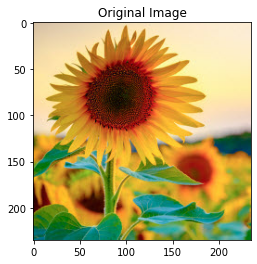

In [13]:
# 读取图片信息
path = '../Datasets/sunflower.jpg'
img = mpimg.imread(path)

title = 'Original Image'
plt.title(title)
plt.imshow(img)
plt.show()

(235, 100)
0.9982352350820378
(235, 235)
(235, 100)
0.9984372616943192
(235, 235)
(235, 100)
0.9982038563885381
(235, 235)


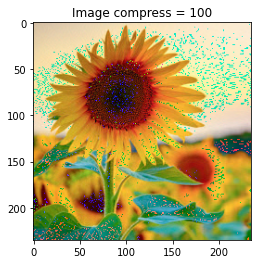

(235, 50)
0.9884606653035581
(235, 235)
(235, 50)
0.9913187935694094
(235, 235)
(235, 50)
0.9897087277593913
(235, 235)


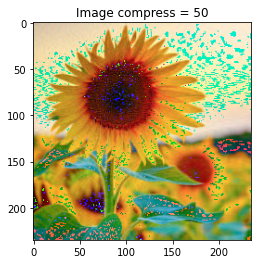

(235, 20)
0.9623539030008724
(235, 235)
(235, 20)
0.966329323175832
(235, 235)
(235, 20)
0.9566350579155399
(235, 235)


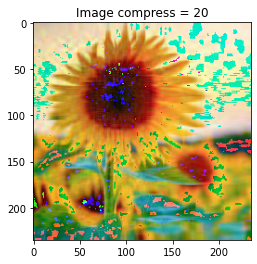

(235, 5)
0.8452349821428481
(235, 235)
(235, 5)
0.8784425192760614
(235, 235)
(235, 5)
0.8528387351154043
(235, 235)


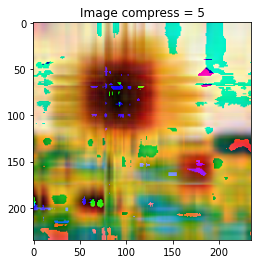

In [14]:
# 不同的压缩值
weights = [100, 50, 20, 5]

for k in weights:
    newImage = compressImage(img, k)
    
    title = 'Image compress = %s' %k
    plt.title(title)
    plt.imshow(newImage)
    plt.show()
    
    # 保存图片
    #newname = os.path.splitext(path)[0] + '_comp_' + str(k) + '.jpg'
    #mpimg.imsave(newname, newImg)